In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [6]:
data = pd.read_csv("results/su_ddpg_5_14/ddpg.csv")

In [15]:
def data_stats(data):
    print(f"Max episode reward: {data.episode_reward.max()}")
    print(f"Best timestep reward: {data.max_reward.max()}")
    best_test_episode = data.dropna().sort_values('test_episode_reward_mean', ascending=False).iloc[0]
    print(f"Best tested avg episode reward: {best_test_episode.test_episode_reward_mean} - episode {best_test_episode.episode}")

    print()

    for i in range(len(data) // 100):
        print(data[100*i:100*i + 100].episode_reward.mean())

    print()

    for i in range(len(data) // 100):
        print(data[100*i:100*i + 100].max_reward.mean())

#     print()

#     for i in range(len(data) // 100):
#         print(data[100*i:100*i + 100].max_reward.mean())

In [13]:
def analyze_data(data):
    data_stats(data)
    
    plt.figure(figsize=(20,15))
    ax = plt.subplot(3, 1, 1)
    ax.set_ylim(-350, 350)
    sns.lineplot(x="episode", y="episode_reward", data=data, ax=ax)
    
    ax = plt.subplot(3, 1, 2)
    sns.lineplot(x="episode", y="mean_pi_loss", data=data, ax=ax)
    
    ax = plt.subplot(3, 1, 3)
    sns.lineplot(x="episode", y="mean_q_loss", data=data, ax=ax)

In [108]:
analyze_data(data)

Max episode reward: 281.1691632666488
Best timestep reward: 0.9416367057561874


AttributeError: 'DataFrame' object has no attribute 'test_episode_reward_mean'

Max episode reward: 287.9020402543013
Best timestep reward: 1.0744471430182456
Best tested avg episode reward: 270.44083080981216 - episode 19709

-121.52660108643653
-116.52674145234519
-117.09255207823527
-127.5478132597582
-108.89448040731813
-64.60421914450806
-20.403769956674317
-73.86399108709548
-62.240846235017315
-56.24736770702744
-66.88476582554625
-63.04507965975067
-66.17982268526104
-63.62263246440764
-83.99185683675277
-118.0980356478317
-122.56606483233526
-122.98986757527929
-90.96994461070398
-79.67520853340227
-48.68186557538868
-79.27131112766841
-96.57552282055745
-66.56332921919352
-24.482442005374097
-14.394109872059632
-63.234338008636286
-49.18193870822736
-48.61050706999198
-62.99873967504765
-73.35600775606757
-44.95641014997283
-44.69194802985801
-52.162279629537586
-70.86143152453096
-71.01117082908924
-75.08548982189627
-70.199061177647
-60.389019517823044
-87.53684809898232
-78.20650430626598
-65.03816194104144
-82.9222369227055
-71.5522570631305
-66.4675

AttributeError: module 'seaborn' has no attribute 'lineplot'

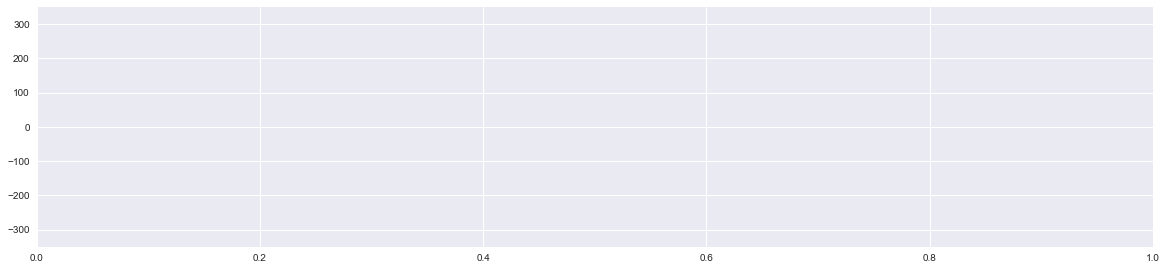

In [17]:
current_data = pd.read_csv("results/ddpg_5_17/ddpg.csv")
analyze_data(current_data)

In [98]:
current_data.head()

,episode,steps,episode_reward,max_reward,min_reward,game_over,hull_position_x,hull_position_y,hull_linearVelocity_x,hull_linearVelocity_y,max_pi_loss,min_pi_loss,mean_pi_loss,max_q_loss,min_q_loss,mean_q_loss,test_episode_reward_mean,test_episode_reward_max,test_episode_reward_min
0,1,57,-112.494812,0.121820,-100.000000,True,3.689842,4.377407,-1.827684e+00,-7.086356e-02,-1000.000000,-1000.000000,-1000.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,2,79,-109.792129,0.013496,-100.000000,True,5.075579,4.493473,8.100086e-01,-1.356107e-01,0.000002,-0.292059,-0.119113,100.057120,0.075004,87.096040,-1000.0,-1000.0,-1000.0
2,3,1600,-151.669118,0.177083,-0.208195,False,4.992343,5.114151,7.678507e-08,-1.523050e-08,0.091136,-0.781564,-0.187955,180.723330,0.003211,10.093946,-1000.0,-1000.0,-1000.0
3,4,1600,-148.499899,0.297791,-0.460229,False,5.869311,4.894284,-1.031196e-07,1.609737e-07,0.233755,-0.239436,0.036014,84.894810,0.003604,0.540751,-1000.0,-1000.0,-1000.0
4,5,100,-102.190369,0.291920,-100.000000,True,7.011808,4.233548,1.265491e+00,7.360162e-01,0.088825,-0.179845,-0.044861,25.762423,0.014896,1.706450,-1000.0,-1000.0,-1000.0


In [104]:
current_data[current_data.test_episode_reward_mean != -1000].dropna().test_episode_reward_mean.max()

259.3388183234209

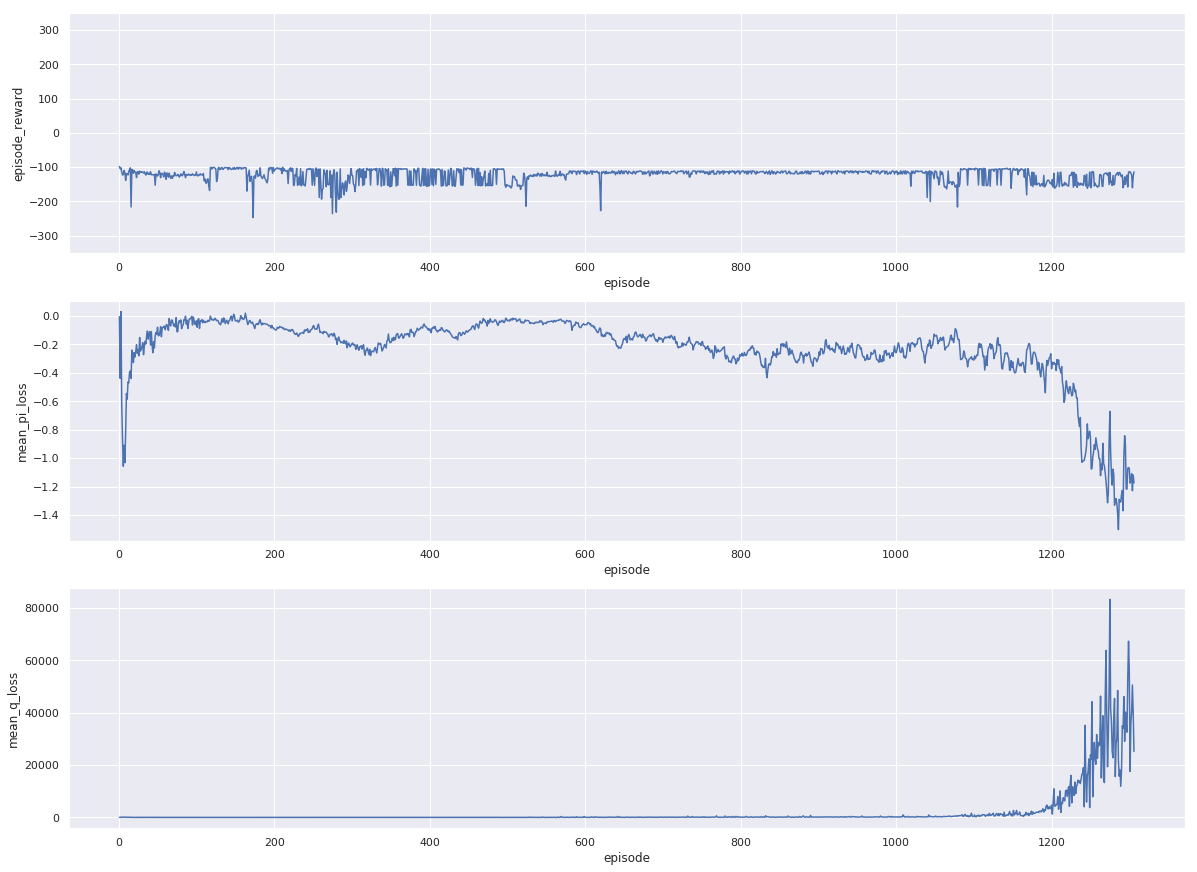

In [33]:
current_data = pd.read_csv("results/ddpg_5_15/ddpg1.csv")
analyze_data(current_data)

In [1]:
import gym
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from agents.ddpg.agent import DDPG

env = gym.make("BipedalWalker-v2")
video = VideoRecorder(env, base_path="./video_5_17")
agent = DDPG(env)
agent.load_models(path="results/ddpg_5_17/", suffix="_episode_2548")

episode_rewards = []

for i in range(10):
    observation = env.reset()
    agent.reset_episode(observation)
    episode_reward = 0
    
    for t in range(1600):
        video.capture_frame()
        action = agent.get_action(observation)
        observation, reward, done, info = env.step(action)

        # Capture reward
        episode_reward += reward
        
        if done or (t == 1599):
            episode_rewards.append(episode_reward)
            break
        
video.close()
env.close()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
states (InputLayer)          (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               10000     
_________________________________________________________________
activation_1 (Activation)    (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
actions (Dense)              (None, 4)                 1204      
Total params: 131,504
Trainable params: 131,504
Non-trainable params: 

/usr/local/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Instructions for updating:
Use tf.cast instead.


In [20]:
episode_rewards

[-64.63630855472388,
 -65.40145688717936,
 283.77416304193423,
 158.5959029122323,
 11.16425019156631,
 24.66269764981162,
 -33.590033672797816,
 283.1281403176765,
 88.02646811244972,
 -64.78365477496078]